# L7. Solving Equations

Today we will be looking at numerical methods for solving equations and finding fixed points. These are also pretty ubiquitous in economics:
- Most notions of equilibrium involve solving an equation (e.g. demand = supply) or finding a fixed point (e.g., a NE is a fixed point of the best-response correspondence)
- Dynamic programming: the value function is a solution to the Bellman equation, or, equivalently, a fixed point of the Bellman operator
- Z-estimators, such as Method of Moments estimators
- Comparative statics

## 1. One-Dimensional Problems
In this section, we consider the problem of finding a point $x^*$ such that $f(x^*) = 0$ for a function $f(x) : \mathbb{R} \to \mathbb{R}$ of a single variable.

### 1.1. Bisection Algorithm
Suppose that $f$ is continuous on $[a,b]$ for two points $a < b$, and that $f(a)f(b) < 0$ (i.e. $f(a)$ and $f(b)$ have different signs). By the intermediate value theorem, there must be at least some point $x^* \in (a,b)$ such that $f(x^*) = 0$. The bisection methods uses this argument repeatedly to find a zero of $f$:

- **Initialization:** bracket a zero, i.e., find $a_1 < b_1$ such that $f(a_1)f(b_1) < 0$.
- **At each step $t \geq 1$:**
    1. Compute the mid-point: $c_t = (a_t + b_t)/2$.
    2. Check the stopping rule: If $|f(c_t)| \leq \delta$ or $b_t - a_t \leq \epsilon (1 + |a_t| + |b_t|)$, STOP and report $c_t$ as the solution. Otherwise, continue to Step 3.
    3. Refine the bounds: If $f(a_t)f(c_t) < 0$, then set $b_{t+1} = c_t$ and leave $a_{t+1} = a_t$ unchanged. Otherwise, set $a_{t+1} = c_t$ and leave $b_{t+1} = b_t$ unchanged.
    
Some discussion of the stopping rule: we are asking the computer to stop if $|f(c_t)| \leq \delta$ or $b_t - a_t \leq \epsilon (1 + |a_t| + |b_t|)$. Remember the discussion about machine precision: there is no point in choosing $\delta$ smaller than the machine epsilon at 0, since $f(c_t)$ and $0$ will be undistinguishable numerically. Similarly, we are asking the algorithm to stop if $a_t$ and $b_t$ get very close (the precision to which they can be distinguished depends on their absolute magnitude). The procedure guarantees that there is a zero between $a_t$ and $b_t$ at each step, so if $a_t$ and $b_t$ are very close, then the mid-point $c_t$ will be close to the solution as well.

The convergence of the bisection method is **linear**, meaning:
$$\limsup_{t\to\infty} \frac{|x_{t+1} - x^*|}{|x_t - x^*|} < \infty$$
which can be quite slow. However, if you can find starting points such that $f(a_0)f(b_0) < 0$, the method is guaranteed to converge.

### 1.2. Newton's Method
This method is based on linearizing the function around a point $x_t$, $g(x) = f(x_t) + f'(x_t)(x - x_t)$, and finding a root of the linearized function, which you use as your next guess:
$$x_{t+1} = x_t - f'(x_t)^{-1} f(x_t).$$

This may look familiar to you from the optimization session! In essence, Newton's method for optimization is just Netwon's method for zero-solving applied to the FOC of the problem. Conversely, consider the function $F(x) = \frac{1}{2}f(x)^2 \geq 0$. If there is $x^*$ such that $f(x^*) = 0$, then $x^* \in \arg\min_x F(x)$. Using the optimization version of Newton's method to solve this problem is equivalent to using the zero-finding version of Newton's above.

This is how the method works:

- **Initialization:** initialize with a starting point $x_1$.
- **At each step $t \geq 1$:**
    1. Compute the next iterate: $x_{t+1} = x_t - f'(x_t)^{-1} f(x_t).$ 
    2. Check the stopping rule: If $|x_{t+1} - x_t| \leq \epsilon(1 + |x_{t+1}|)$ STOP.
- Finally, **check for convergence**. If $|f(x_{t+1})| \leq \delta$ report success in finding a zero, otherwise, report failure.

When $f \in C^2$, $f'(x^*) \neq 0$ and $|f''(x^*)| \leq \infty$, Newton's method has a **quadratic** rate of convergence for $x_0$ sufficiently close to $x^*$, meaning:
$$\limsup_{t\to\infty} \frac{|x_{t+1} - x^*|}{|x_t - x^*|^2} < \infty.$$

However, if $f'(x^*) = 0$ (i.e. $f$ is quite flat around the solution), then the convergence can be as slow as linear (for example, if $f(x) = x^6$, then $x_{t+1} = \frac{5}{6}x_t$). 

In some cases, Newton's algorithm may diverge or converge to a cycle. For example, consider $f(x) = x^3 - 5x$. Then, $$x_{t+1} = x_t - \frac{x_t^3 - 5x}{3x_t^2 - 5} = \frac{2x_t^3}{3x_t^2 - 5},$$ 

so that if $x_t = 1$ then $x_{t+1} = -1$, and if $x_t = -1$, then $x_{t+1} = 1$. Hence, if Newton's method ever hits 1 or $-1$, it will get stuck on a loop between those two values.


### 1.3. Secant Method
This is very similar to Newton's method, and is useful when $f'(x_t)$ is difficult to compute. Instead, $f'(x_t)$ is approximated with the slope between $x_t$ and $x_{t-1}$, so that the update rule is:
$$x_{t+1} = x_t - \left[\frac{f(x_t) - f(x_{t-1})}{x_t - x_{t-1}}\right]^{-1} f(x_t).$$

If $f'(x^*) \neq 0$ and $f'(x)$, $f''(x)$ are continuous near $x^*$, the rate of convergence is $(1 + \sqrt{5})/2 \approx 1.6$:
$$\limsup_{t\to\infty} \frac{|x_{t+1} - x^*|}{|x_t - x^*|^{(1 + \sqrt{5})/2}} < \infty.$$
Hence, you may need more iterations to get close to the solution than with Newton's method (but the process may still be faster than Newton's method as it avoids computing the derivative).

In [1]:
using NLsolve

# Example:
# f(x) = arctan(x) has a root at 0
# Newton method converges if starting between R and -R for R ≈ 1.3917
# If starting at R, then it oscillates between R and -R
# If starting at x_0 > R, then the method diverges

function f!(F, x) # Functions that modify arguments in place are faster
    F[1] = atan(x[1])
end

function g!(G, x) # Gradient
    G[1] = 1.0/(1.0 + x[1]^2)
end

@show nlsolve(f!, g!, [0.5], method = :newton) # analytic gradient
@time nlsolve(f!, g!, [0.5], method = :newton)
print("\n")
@show nlsolve(f!, [0.5], method = :newton) # compute gradients by finite differences
@time nlsolve(f!, [0.5], method = :newton)
print("\n")
@show nlsolve(f!, [0.5], method = :newton, autodiff = :forward) # compute gradients by AD
@time nlsolve(f!, [0.5], method = :newton, autodiff = :forward)
print("\n")
@show nlsolve(f!, [1.4], method = :newton, autodiff = :forward) # diverge. Error because gradient tends to 0
@time nlsolve(f!, [1.4], method = :newton, autodiff = :forward);

nlsolve(f!, g!, [0.5], method = :newton) = Results of Nonlinear Solver Algorithm
 * Algorithm: Newton with line-search
 * Starting Point: [0.5]
 * Zero: [-2.5131473616567257e-11]
 * Inf-norm of residuals: 0.000000
 * Iterations: 3
 * Convergence: true
   * |x - x'| < 0.0e+00: false
   * |f(x)| < 1.0e-08: true
 * Function Calls (f): 4
 * Jacobian Calls (df/dx): 4
  0.000011 seconds (42 allocations: 2.391 KiB)

nlsolve(f!, [0.5], method = :newton) = Results of Nonlinear Solver Algorithm
 * Algorithm: Newton with line-search
 * Starting Point: [0.5]
 * Zero: [-2.5135571521308492e-11]
 * Inf-norm of residuals: 0.000000
 * Iterations: 3
 * Convergence: true
   * |x - x'| < 0.0e+00: false
   * |f(x)| < 1.0e-08: true
 * Function Calls (f): 4
 * Jacobian Calls (df/dx): 4
  0.000018 seconds (45 allocations: 2.688 KiB)

nlsolve(f!, [0.5], method = :newton, autodiff = :forward) = Results of Nonlinear Solver Algorithm
 * Algorithm: Newton with line-search
 * Starting Point: [0.5]
 * Zero: [-2.5131

LoadError: LinearAlgebra.SingularException(1)

In [2]:
# An example of a function that has an attractive loop:
# You converge only if you start close to the root
# otherwise, you converge to a loop

function f(F, x)
    F[1] = x[1]^5 - x[1] - 1.0
end 

@show nlsolve(f, [0.0], method = :newton)
print("\n")
@show nlsolve(f, [1.0], method = :newton);

nlsolve(f, [0.0], method = :newton) = Results of Nonlinear Solver Algorithm
 * Algorithm: Newton with line-search
 * Starting Point: [0.0]
 * Zero: [-1.0002575619490188]
 * Inf-norm of residuals: 1.001031
 * Iterations: 1000
 * Convergence: false
   * |x - x'| < 0.0e+00: false
   * |f(x)| < 1.0e-08: false
 * Function Calls (f): 1001
 * Jacobian Calls (df/dx): 1001

nlsolve(f, [1.0], method = :newton) = Results of Nonlinear Solver Algorithm
 * Algorithm: Newton with line-search
 * Starting Point: [1.0]
 * Zero: [1.1673039782614396]
 * Inf-norm of residuals: 0.000000
 * Iterations: 5
 * Convergence: true
   * |x - x'| < 0.0e+00: false
   * |f(x)| < 1.0e-08: true
 * Function Calls (f): 6
 * Jacobian Calls (df/dx): 6


## 2. Multi-Dimensional Problems
Suppose instead that we are trying to solve $f(x) = 0$ for an $f:\mathbb{R}^n \to \mathbb{R}^n$ (i.e. $n$ equations in $n$ unknowns):
\begin{gather*}
f_1(x_1, x_2, \ldots, x_n) = 0 \\
f_2(x_1, x_2, \ldots, x_n) = 0 \\
\vdots \\
f_n(x_1, x_2, \ldots, x_n) = 0
\end{gather*}

The goal here is to come up with methods that allow us to apply the algorithms for one-dimensional problems.

### 2.1. Gauss-Jacobi Method
At each step, we start with an iterate $x^{(t)}$. We find the next iterate $x^{(t+1)}$ by solving $n$ one-dimensional equations:
\begin{gather*}
f_1(x_1^{(t+1)}, x_2^{(t)}, \ldots, x_n^{(t)}) = 0 \\
f_2(x_1^{(t)}, x_2^{(t+1)}, \ldots, x_n^{(t)}) = 0 \\
\vdots \\
f_n(x_1^{(t)}, x_2^{(t)}, \ldots, x_n^{(t+1)}) = 0
\end{gather*}
using the algorithms we talked about in the previous section separatedly for each of these.

Notice that this method is affected by how we index variables and equations. Ideally, we would like to make the system as triangular as possible (i.e. if an equation depends only on one variable, let those both have the same index).

Instead of solving each equation precisely, we could take only a single Newton step at each iteration, which is known as **linear Gauss-Jacobi method**:
$$x_i^{(t+1)} = x_i^{(t)} - \left[ \frac{\partial f_i(x_1^{(t)}, \ldots, x_n^{(t)})}{\partial x_i}\right]^{-1} f_i(x_1^{(t)}, \ldots, x_n^{(t)}) \quad i = 1, \ldots, n.$$

### 2.2. Gauss-Seidel Method
The idea is very similar to the one before, but it uses a guess for $x_i$ as soon as it is available. Hence, we solve the following equations sequentially:
\begin{gather*}
f_1(x_1^{(t+1)}, x_2^{(t)}, \ldots, x_n^{(t)}) = 0 \\
f_2(x_1^{(t+1)}, x_2^{(t+1)}, \ldots, x_n^{(t)}) = 0 \\
\vdots \\
f_n(x_1^{(t+1)}, x_2^{(t+1)}, \ldots, x_n^{(t+1)}) = 0
\end{gather*}

(Each equation introduces a new variable, so they can be viewed as one-dimensional equations.)

Again, instead of solving each equation precisely, we could take only a single Newton step at each iteration, which is known as **linear Gauss-Seidel method**:
$$x_i^{(t+1)} = x_i^{(t)} - \left[ \frac{\partial f_i(x_1^{(t+1)}, \ldots, x_{i-1}^{(t+1)}, x_{i}^{(t)}, \ldots x_n^{(t)})}{\partial x_i}\right]^{-1} f_i(x_1^{(t+1)}, \ldots, x_{i-1}^{(t+1)}, x_{i}^{(t)}, \ldots x_n^{(t)}) \quad i = 1, \ldots, n.$$

Convergence of Gaussian methods is guaranteed to be **linear** when $\nabla f$ is diagonally dominant, i.e. $|(\nabla f)_{ii}| > \sum_{j\neq i} |(\nabla f)_{ij}|$ for all $i = 1, \ldots, n$ (i.e. the system is sufficiently block diagonal, the ideal case being when each equation contains only one unknown).

Gaussian methods can be combined with **dampening** or **acceleration**. The simplest case is:
$$x^{(t+1)} = \omega G(x^{(t)}) + (1 - \omega) x^{(t)},$$
where $G(x^{(t)})$ is the updating rule. When $\omega < 1$, this is called _dampening_, and it can help achieve convergence in cases where the un-dampened method overshoots and diverges or oscillates. In other cases, $\omega$ can be chosen to be larger than 1 to accelerate convergence. A smart way to combine dampening and acceleration, which is implemented in Julia, is **Anderson acceleration**. This procedure uses up to $m$ values of the previous iterations. At step $t$, let $m_t = \min\{m, t\}$. Then the update rule is:
$$x^{(t+1)} = \sum_{i=0}^{m_t} \omega^{(t)}_i G(x^{(t-m_t+i)}),$$
where the weights are chosen as:
$$\min_{\omega} \Vert F^{(t)}\omega \Vert_2 \quad \text{subj. to} \quad\sum_{i=0}^{m_t} \omega_i = 1$$
for $F^{(t)} = [G(x^{(t-m_t)}) - x^{(t-m_t)}, \ldots, G(x^{(t)}) - x^{(t)}]$.

### 2.3. Newton's Method
It is also possible to use a multivariate version of Newton's method:
$$x^{(t+1)}= x^{(t)} - (\nabla f(x^{(t)}))^{-1} f(x^{(t)}).$$

Notice that this uses all the information in the Jacobian matrix, including the off-diagonal elements, in contrast to the linear Gaussian methods, which use only the diagonal elements. Convergence of Newton's method is **quadratic** as long as $\det(\nabla f(x^*))) \neq 0$ and $\nabla f(x)$ is Lipschitz around $x^*$. As before, this is closely related to Newton's method for optimization, minimizing the function $F(x) = \frac{1}{2} \Vert f(x) \Vert^2 \geq 0$.


However, obtaining the Jacobian matrix can be computationally expensive. An analogue to the secant method exists for multivariate functions, called **Broyden's method**. 

### 2.4. Example: Successive BR Iteration is Gauss-Seidel
Do you remember the firms' problem in L1 that we faced in L1?
$$\max_{p_{j}} N \cdot s_{j}(\mathbf{p}) \cdot (p_{j} - c_{j}) \quad \text{subj. to } s_{j}(\mathbf{p}) = \frac{\exp(\delta_j - \alpha p_{j} + \xi_{j})}{1 + \sum_{k=1}^2 \exp(\delta_k - \alpha p_{k} + \xi_{k})}, \quad j \in \{1,2\}.$$

The second way we solved this problem was, at each iteration $t$:
1. Solve for $p^{(t+1)}_2$, firm 2's best response, given our *previous* guess for $p^{(t)}_1$.
2. Solve for $p^{(t+1)}_1$, firm 1's best response, given our *current* guess for $p^{(t+1)}_2$.

This is an application of the Gauss-Seidel algorithm! The equations here are:
\begin{align*}
f_1(p_1, p_2) = p_1 - \arg\max_p \Pi_1(p, p_2) = 0 \\
f_2(p_1, p_2) = p_2 - \arg\max_p \Pi_2(p, p_1) = 0
\end{align*}
where $\Pi_i(p_i, p_{-i})$ is firm $i$'s profit.

Now that we know more about equation solving, let's try to implement variations on this method, including: Gauss-Jacobi, dampening, acceleration, and Anderson acceleration.

In [3]:
const J = 2
const N = 500

const α = 0.5
const δ = [2.0, 1.8]
const σ = 0.25;

In [4]:
using Optim, LinearAlgebra, Random

Random.seed!(123) # Set the seed for the pseudo-random number generator
ξ = σ .* randn(J)

# Shares
function shares(p::Vector; α=α, δ=δ, ξ=ξ)   
    # Inputs 
    # p : A 1xJ vector of prices 
    # Outputs 
    # s : A TxJ vector of market shares      
    s = exp.(δ .- α .* p .+ ξ)./(1.0 .+ sum(exp.(δ .- α .* p .+ ξ)))
end;

c = exp.(0.25randn((J)))

# Profit
function profit(own_p::Float64, other_p::Float64; α=α, δ=δ, ξ=ξ, j=1) 
   p = j == 1 ? [own_p, other_p] : [other_p, own_p]
   return N * shares(p)[j] * (own_p - c[j]::Float64)
end

function eq_prices_BR(; α=α, δ=δ, ξ=ξ, tol = 1e-20, max_iter = 10000, Jacobi = false, ω = 1.0, printiter = false)
    
    p = zeros(Float64, J)
    
    p_old = [1.0, 1.0]
    p_new = [1.0, 1.0]
    error = 1000.0
    iter = 0
        
    while (error > tol) & (iter < max_iter)
        res = optimize(x -> -profit(x[1], p_old[1], α=α, δ=δ, ξ=ξ, j=2), [p_old[2]]) # Compute 2's BR
        br2 = res.minimizer[1]
        res = optimize(x -> -profit(x[1], Jacobi ? p_old[2] : br2, α=α, δ=δ, ξ=ξ, j=1), [p_old[1]]) # Compute 1's BR with Gauss-Seidel or Gauss-Jacobi
        br1 = res.minimizer[1]
        p_new = ω .* [br1, br2] .+ (1.0 .- ω) .* p_old # Allow for dampening or acceleration
        iter += 1
        error = norm(p_new .- p_old)
        p_old = copy(p_new)
    end
        
    p = copy(p_new)
    
    iter < max_iter || print("Failed to converge in $iter iterations \n")
    printiter & (iter < max_iter) && print("Converged in $iter iterations \n") 
    
    return p
end;

In [5]:
# Baseline
p1 = eq_prices_BR()
@time p = eq_prices_BR(printiter = true);
print("\n")

# Gauss-Jacobi
p2 = eq_prices_BR(Jacobi = true)
@time p = eq_prices_BR(Jacobi = true, printiter = true);
print("\n")

# Gauss-Seidel with acceleration
p3 = eq_prices_BR(ω = 1.2)
@time p = eq_prices_BR(ω = 1.2, printiter = true);
print("\n")

# Gauss-Seidel with dampening
p4 = eq_prices_BR(ω = 0.8)
@time p = eq_prices_BR(ω = 0.8, printiter = true);
print("\n")

Converged in 5 iterations 
  0.000217 seconds (3.15 k allocations: 124.070 KiB)

Converged in 8 iterations 
  0.000240 seconds (4.93 k allocations: 194.492 KiB)

Failed to converge in 10000 iterations 
Failed to converge in 10000 iterations 
  0.187258 seconds (5.79 M allocations: 224.251 MiB, 4.00% gc time)

Converged in 10 iterations 
  0.000275 seconds (6.46 k allocations: 252.586 KiB)



In [6]:
# Now, let's use Anderson acceleration
# For that, we'll just code the equations and use NLsolve

function f!(F, p)
    F[1] = p[1] - optimize(x -> -profit(x[1], p[2], α=α, δ=δ, ξ=ξ, j=1), [p[1]]).minimizer[1]
    F[2] = p[2] - optimize(x -> -profit(x[1], p[1], α=α, δ=δ, ξ=ξ, j=2), [p[2]]).minimizer[1]
end

@show nlsolve(f!, [1.0, 1.0], method = :anderson)
@time nlsolve(f!, [1.0, 1.0], method = :anderson);

nlsolve(f!, [1.0, 1.0], method = :anderson) = Results of Nonlinear Solver Algorithm
 * Algorithm: Anderson m=2 beta=1 aa_start=1 droptol=1.0e10
 * Starting Point: [1.0, 1.0]
 * Zero: [3.791715077354832, 3.644748936455604]
 * Inf-norm of residuals: 0.000000
 * Iterations: 8
 * Convergence: true
   * |x - x'| < 0.0e+00: true
   * |f(x)| < 1.0e-08: true
 * Function Calls (f): 8
 * Jacobian Calls (df/dx): 0
  0.000278 seconds (6.14 k allocations: 246.648 KiB)


In [7]:
# Newton is a bit slow in this case (you need to differentiate the argmax function)

@show nlsolve(f!, [1.0, 1.0], method = :newton)
@time nlsolve(f!, [1.0, 1.0], method = :newton);

nlsolve(f!, [1.0, 1.0], method = :newton) = Results of Nonlinear Solver Algorithm
 * Algorithm: Newton with line-search
 * Starting Point: [1.0, 1.0]
 * Zero: [3.7917170172576435, 3.6447510565964887]
 * Inf-norm of residuals: 0.000000
 * Iterations: 17
 * Convergence: true
   * |x - x'| < 0.0e+00: false
   * |f(x)| < 1.0e-08: true
 * Function Calls (f): 18
 * Jacobian Calls (df/dx): 18
  0.002447 seconds (66.07 k allocations: 2.509 MiB)


## 3. Fixed-Point iteration
In some cases, the problem we want to solve has the following form:
$$x = g(x)$$
(i.e. finding a fixed point of $g$). In those cases, we can use fixed-point iteration:
$$x^{(t+1)} = g(x^{(t)}).$$

The **contraction mapping theorem** guarantees that, if $g:D\subset\mathbb{R}^n \to \mathbb{R}^n$ is a $C^1$ function defined on a compact and convex set $D$ such that $g(D) \subset D$ and $\max_{x\in D} \Vert \nabla g(x) \Vert_{\infty} < 1$, then the fixed point has a unique solution, and fixed point iteration converges to that solution. For functions defined over all $\mathbb{R}^n$, convergence is guaranteed for $x_0$ sufficiently close to $x^*$ when $\rho(\nabla g(x^*)) < 1$ (the spectral radius is the maximum absolute eigenvalue).

Acceleration and dampening can also be applied in this setting, with $$x^{(t+1)} = \omega g(x^{(t)}) + (1 - \omega) x^{(t)}.$$

_Note_ (Newton's method as a contraction mapping): The proof that Newton's method works uses the fact that $g(x) = x - (\nabla f(x))^{-1} f(x)$ is a contraction locally around $x^*$ when $\det (\nabla f(x^*)) \neq 0$.

### 3.1. Example
Going back to our example, notice that, at each iteration, the algorithm needs to solve a maximization problem numerically. In this case, it is quite fast. We do know, however, the form of the FOC for the firms:
$$p_{jt} = c_{jt} - \frac{s_{jt}(\mathbf{p}_t)}{\partial s_{jt}(\mathbf{p}_t)/\partial p_{jt}},$$ where $\partial s_{jt}(\mathbf{p}_t)/\partial p_{jt} = -\alpha s_{jt}(\mathbf{p}_t) (1 - s_{jt}(\mathbf{p}_t))$.

This is a fixed point problem! 

In [8]:
FOC(p::Vector{Float64}; α=α, δ=δ, ξ=ξ) = c::Vector{Float64} .+ 1.0 ./ (α .* (1.0 .- shares(p, α=α, δ=δ, ξ=ξ)))

# Note: NLSolve has a function fixedpoint(g, ...), which is a wrapper for nlsolve(x -> g(x) - x, ...)

# Simple fixed point iteration: Anderson acceleration with m=0
@show fixedpoint(FOC, [1.0, 1.0], m=0)
@time fixedpoint(FOC, [1.0, 1.0], m=0);
print("\n")

# Anderson acceleration with default m=2
@show fixedpoint(FOC, [1.0, 1.0])
@time fixedpoint(FOC, [1.0, 1.0]);
print("\n")

# Newton
@show fixedpoint(FOC, [1.0, 1.0], method = :newton)
@time fixedpoint(FOC, [1.0, 1.0], method = :newton);

fixedpoint(FOC, [1.0, 1.0], m = 0) = Results of Nonlinear Solver Algorithm
 * Algorithm: Anderson m=0 beta=1 aa_start=1 droptol=0
 * Starting Point: [1.0, 1.0]
 * Zero: [3.791715001628308, 3.6447477213141637]
 * Inf-norm of residuals: 0.000000
 * Iterations: 50
 * Convergence: true
   * |x - x'| < 0.0e+00: false
   * |f(x)| < 1.0e-08: true
 * Function Calls (f): 50
 * Jacobian Calls (df/dx): 0
  0.000036 seconds (287 allocations: 21.734 KiB)

fixedpoint(FOC, [1.0, 1.0]) = Results of Nonlinear Solver Algorithm
 * Algorithm: Anderson m=2 beta=1 aa_start=1 droptol=0
 * Starting Point: [1.0, 1.0]
 * Zero: [3.791714997433294, 3.644747723465662]
 * Inf-norm of residuals: 0.000000
 * Iterations: 8
 * Convergence: true
   * |x - x'| < 0.0e+00: false
   * |f(x)| < 1.0e-08: true
 * Function Calls (f): 8
 * Jacobian Calls (df/dx): 0
  0.000027 seconds (85 allocations: 6.016 KiB)

fixedpoint(FOC, [1.0, 1.0], method = :newton) = Results of Nonlinear Solver Algorithm
 * Algorithm: Newton with line-s

Do you remember where else we tried to find a fixed point based on a contraction mapping? When solving Bellman equations, we looked for a solution of:
$$V(x_i) = \max_{0 \leq c \leq x_i}\{u(c) + \beta \widetilde{V}(x_i - c)\} \quad i = 1, \ldots, n$$

In [9]:
using BasicInterpolators

x0 = 10.0
x_grid = range(0.0, x0, 50)
u(c::Float64) = log(c)

function Bellman_lin_interp!(g, v; β = 0.9, x_grid = x_grid)
    v_interp = LinearInterpolator(x_grid, v)
    
    for (i, x) in enumerate(x_grid)
        g[i] = -optimize(c -> -u(c+1e-3) - β*v_interp(x-c), 0.0, x).minimum
    end
    
    return g
end

v0 = ones(Float64, length(x_grid))

# Simple fixed point iteration (this is Anderson acceleration with m=0)
res1 = fixedpoint(Bellman_lin_interp!, v0, m=0)
@time fixedpoint(Bellman_lin_interp!, v0, m=0);
print("\n")

# Anderson acceleration with default m=2
res2 = fixedpoint(Bellman_lin_interp!, v0)
@time fixedpoint(Bellman_lin_interp!, v0);
print("\n")

# Newton
res3 = fixedpoint(Bellman_lin_interp!, v0, method = :newton)
@time fixedpoint(Bellman_lin_interp!, v0, method = :newton);

  0.008246 seconds (20.12 k allocations: 1.809 MiB)

  0.004326 seconds (9.83 k allocations: 931.797 KiB)

  0.051448 seconds (113.38 k allocations: 9.585 MiB)


In this case Anderson acceleration is quite fast! (Faster than the version we coded by hand)

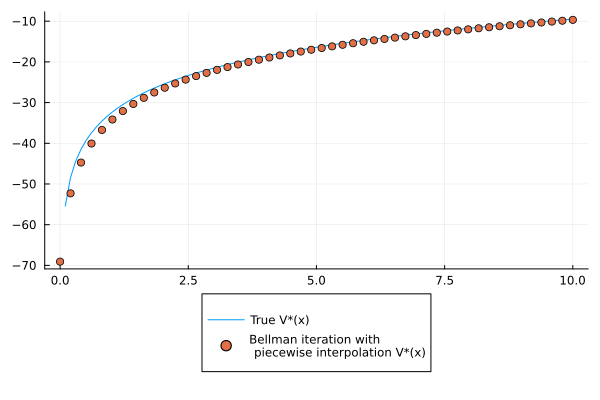

In [10]:
using Plots

plot_grid = range(x_grid[1], x_grid[end], length=100) # Finer grid for plot
V_true(x; β = 0.9) = log(x)/(1.0 - β) + log(1.0 - β)/(1.0 - β) + β*log(β) / (1.0 - β)^2

gr()
plot(plot_grid, V_true.(plot_grid), label = "True V*(x)", legend = :outerbottom)
display(plot!(scatter!(x_grid, res2.zero, label = "Bellman iteration with \n piecewise interpolation V*(x)")))

## Additional Resources
- Quantitative Economics with Julia: [Solvers, Optimizers, and Automatic Differentiation](https://julia.quantecon.org/more_julia/optimization_solver_packages.html)

- Fedor Iskhakov's Foundations of Computational Economics course: [Two very important algorithms for solving equations](https://github.com/fediskhakov/CompEcon/blob/main/13_bisections_newton.ipynb), [Successive approximations (fixed point iterations)](https://github.com/fediskhakov/CompEcon/blob/main/22_succ_aprx.ipynb), [More on Newton-Raphson method](https://github.com/fediskhakov/CompEcon/blob/main/23_mutivariate_newton.ipynb), []

- Judd (1998) Chapter 5 and references therein.

- [JuliaNLSolvers](https://github.com/JuliaNLSolvers): ```NLsolve.jl``` and ```Optim.jl``` are part of this collection. These are the two main packages, but there are others that could be useful to some of you.